# Necessary Packages for Training Datasetes      

In [1]:
# Imports
import numpy as np
import warnings 
import matplotlib.pyplot as plt
from keras.preprocessing.image import ImageDataGenerator
import keras.preprocessing.image
from tensorflow.keras.applications.resnet50 import ResNet50
from keras.applications.xception import Xception
from keras.layers import Dropout, Flatten, Dense, GlobalAveragePooling2D,  Input, Concatenate
from keras.models import Model
from tensorflow.python.keras.optimizers import *


In [2]:
from tensorflow.keras.optimizers import Adam 
from tensorflow.keras.optimizers import SGD

# Assign Image size and Training Rate

In [3]:
warnings.filterwarnings('ignore')
IMAGE_SIZE = (128, 128)
INPUT_SHAPE = (128, 128, 3)
TRAINING_RATE = 0.001

# Load Training and Testing Datasets to generate Model

In [4]:
#read the train and test dataset
train_datagen = ImageDataGenerator()
test_datagen = ImageDataGenerator()

training_set = train_datagen.flow_from_directory(
            'Datasets/train',
            target_size = IMAGE_SIZE,
            class_mode = 'categorical',
            batch_size = 30)

testing_set = test_datagen.flow_from_directory(
            'Datasets/val',
            target_size = IMAGE_SIZE,
            class_mode = 'categorical',
            batch_size = 30)

classes = {v: k for k, v in training_set.class_indices.items()}
classes

Found 8000 images belonging to 2 classes.
Found 1999 images belonging to 2 classes.


{0: 'Normal', 1: 'Tumor'}

# Initialize Training method and Training Rate

In [5]:
#Model
input_shape = INPUT_SHAPE
inputs = Input(input_shape)
input_tensor = Input(shape= (128,128,3))
xception = Xception(include_top=False, input_shape = input_shape)(inputs)
res_net = ResNet50(input_tensor = input_tensor, include_top = False, weights = 'imagenet')(inputs)

#output
outputs = Concatenate(axis=-1)([GlobalAveragePooling2D()(xception), GlobalAveragePooling2D()(res_net)])
outputs = Dropout(0.5)(outputs)
outputs = Dense(len(classes), activation='softmax')(outputs)

# Set Optimizer

opt1 = SGD(learning_rate=TRAINING_RATE)
opt2 = Adam(learning_rate=TRAINING_RATE)

model = Model(inputs, outputs)
model.compile(optimizer=opt1,
              loss='categorical_crossentropy',
              metrics=['accuracy'])

model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 128, 128, 3  0           []                               
                                )]                                                                
                                                                                                  
 xception (Functional)          (None, 4, 4, 2048)   20861480    ['input_1[0][0]']                
                                                                                                  
 resnet50 (Functional)          (None, 4, 4, 2048)   23587712    ['input_1[0][0]']                
                                                                                                  
 global_average_pooling2d (Glob  (None, 2048)        0           ['xception[0][0]']           

# To Start Training Process

In [6]:
# Training
Training_model = model.fit(training_set,
                    steps_per_epoch= len(training_set),
                    epochs= 15,
                    validation_data= testing_set,
                    validation_steps = len(testing_set))

Epoch 1/15
267/267 [==============================] - 95s 293ms/step - loss: 0.3111 - accuracy: 0.8676 - val_loss: 0.1801 - val_accuracy: 0.9390
Epoch 2/15
267/267 [==============================] - 76s 283ms/step - loss: 0.0790 - accuracy: 0.9780 - val_loss: 0.0277 - val_accuracy: 0.9955
Epoch 3/15
267/267 [==============================] - 74s 279ms/step - loss: 0.0369 - accuracy: 0.9925 - val_loss: 0.0102 - val_accuracy: 0.9985
Epoch 4/15
267/267 [==============================] - 76s 286ms/step - loss: 0.0248 - accuracy: 0.9959 - val_loss: 0.0063 - val_accuracy: 1.0000
Epoch 5/15
267/267 [==============================] - 79s 295ms/step - loss: 0.0187 - accuracy: 0.9964 - val_loss: 0.0040 - val_accuracy: 1.0000
Epoch 6/15
267/267 [==============================] - 78s 292ms/step - loss: 0.0137 - accuracy: 0.9974 - val_loss: 0.0034 - val_accuracy: 1.0000
Epoch 7/15
267/267 [==============================] - 75s 281ms/step - loss: 0.0115 - accuracy: 0.9984 - val_loss: 0.0023 - val_ac

# Save Trainned Model

In [7]:
model.save("Trained_Models/LastModel.h5")


# Visualize the Trainned model accuracy

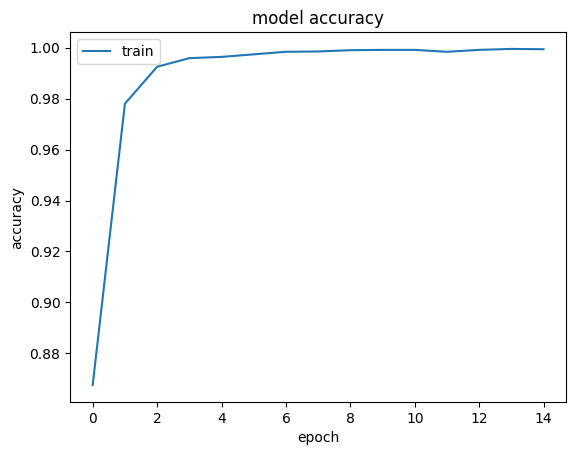

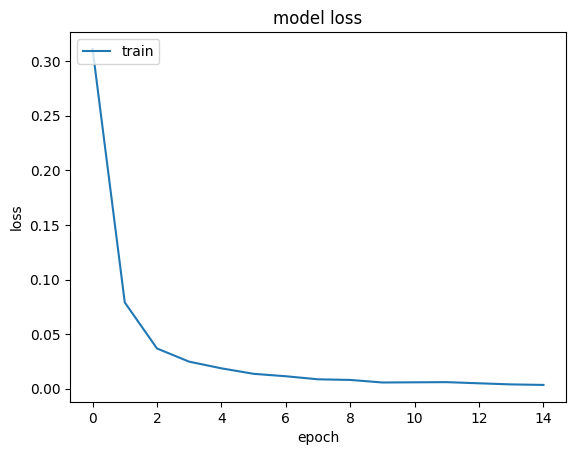

In [8]:
plt.plot(Training_model.history['accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train'], loc='upper left')
plt.show()
# summarize history for loss

plt.plot(Training_model.history['loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train'], loc='upper left')
plt.show()

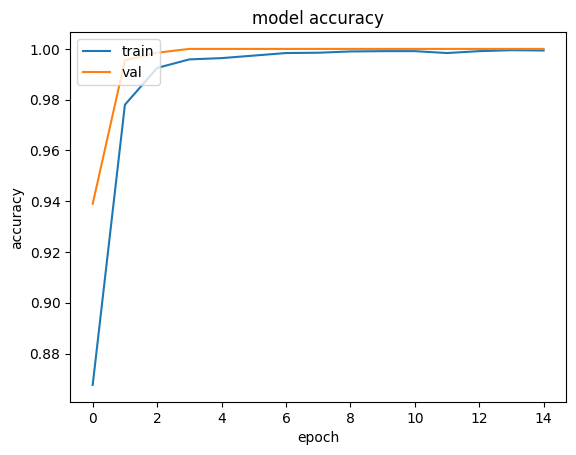

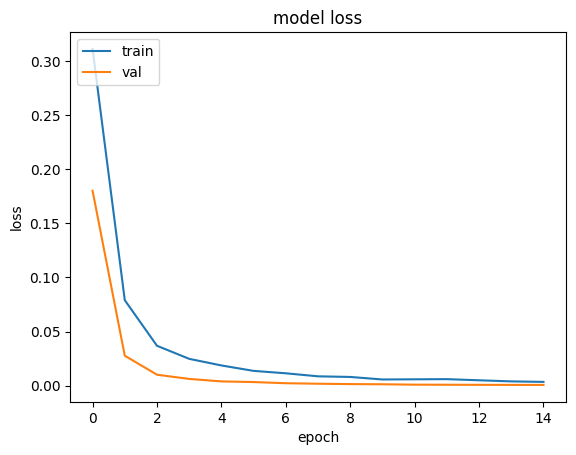

In [9]:
plt.plot(Training_model.history['accuracy'])
plt.plot(Training_model.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()
# summarize history for loss

plt.plot(Training_model.history['loss'])
plt.plot(Training_model.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()